In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression 
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df_1 = pd.read_csv('user1_data.csv')
df_2 = pd.read_csv('user2_data.csv')

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19341 entries, 0 to 19340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   19341 non-null  object 
 1   pm1     19341 non-null  float64
 2   pm2     19341 non-null  float64
 3   pm3     19341 non-null  float64
 4   am      19341 non-null  float64
 5   sm      19341 non-null  float64
 6   st      19341 non-null  float64
 7   lum     19341 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   20166 non-null  object 
 1   pm1     20166 non-null  float64
 2   pm2     20166 non-null  float64
 3   pm3     20166 non-null  float64
 4   am      20166 non-null  float64
 5   sm      20166 non-null  float64
 6   lum     20166 non-null  float64
 7   temp    20166 non-null  float64
 8   humd    20166 non-null  float64
 9   pres    20166 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [6]:
# sns.heatmap(df_1.corr())

In [7]:
df_1.head()

,ttime,pm1,pm2,pm3,am,sm,st,lum
0,2022-07-18 15:42:55,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0
1,2022-07-18 15:47:55,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0
2,2022-07-18 15:52:55,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0
3,2022-07-18 15:57:55,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0
4,2022-07-18 16:02:55,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0


In [8]:
## plots
# sns.scatterplot(df_2['sm'])
# sns.scatterplot(df_1['sm'])

In [9]:
# df_1.drop('ttime',axis=1,inplace=True)
df_1.columns

Index(['ttime', 'pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [68]:
X = df_1.drop(['sm','ttime'],axis=1)
y = df_1["sm"]

In [69]:
# Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

## Plots
# plt.scatter(y_test,predictions)

#  Evaluation Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 1746.1936176175564
Root Mean Squared Error: 1931.6974186003265


In [383]:
# LGBM Regressor

from lightgbm import LGBMRegressor

horizon = 25
    
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]


model = LGBMRegressor(random_state=42)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 12.180156944162222
Mean Squared Error: 15.210097486008056


In [316]:
# model.predict()
# 
# 
abs(model.predict(X)-y)


0        2538.963190
1        2375.408312
2        2496.408312
3        2496.408312
4         210.806313
            ...     
19336       5.952427
19337       4.952427
19338       5.952427
19339       5.952427
19340       4.937987
Name: sm, Length: 19341, dtype: float64

In [317]:
## PLSRegression

from sklearn.cross_decomposition import PLSRegression 
model = PLSRegression(n_components=4)

horizon = 25

X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

model.fit(X_train,y_train)
predictions=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 1414.0793595542036
Mean Squared Error: 1425.5525297354152


In [318]:
# Random Forest

from sklearn.model_selection import train_test_split


X = df_1.drop(['sm','ttime'], axis=1)
y = df_1['sm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X, y)
predictions = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


Mean Absolute Error: 384.6741005487055
Mean Squared Error: 647.3186565621697


In [4]:
# # Neural Network
# # import tensorflow as tf
# # print("Importing ...")
# # print("Imported")

# # Normalize the data

# X = df_2.drop(['sm','ttime'], axis=1)
# y = df_2['sm']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


# x_train = tf.keras.utils.normalize(X_train , axis=1)
# x_test = tf.keras.utils.normalize(X_test , axis=1)

# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(15,activation='relu'))

# model.add(tf.keras.layers.Dense(30,activation='relu'))

# model.add(tf.keras.layers.Dense(25,activation='relu'))

# model.add(tf.keras.layers.Dense(1,activation='relu'))

# model.compile(loss='mse',optimizer='adam')

# model.fit(x_train,y_train,epochs = 250)

# model.save('soil.model')

In [319]:
model = tf.keras.models.load_model('soil.model')
# loss, accuracy = model.evaluate(X_test,y_test)

In [3]:
# model.evaluate(x_test,y_test)

In [113]:
# # LSTM 
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, LSTM




# features = df_2.drop('ttime',axis=1)
# # print(features.shape)

# training_dataset_length = math.ceil(len(features) * .75)
# # print(training_dataset_length)

# #Scale all of the data to be values between 0 and 1
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(features)

# train_data = scaled_data[0:training_dataset_length , : ]

# #Splitting the data
# x_train=[]
# y_train = []
# for i in range(10, len(train_data)):
#     x_train.append(train_data[i-1:i,4])
#     y_train.append(train_data[i,4])
    
# #Convert to numpy arrays
# x_train, y_train = np.array(x_train), np.array(y_train)
# #Reshape the data into 3-D array
# x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))    

# from keras.layers import Dropout
# # Initialising the RNN
# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# # Adding a second LSTM layer and Dropout layer
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a third LSTM layer and Dropout layer
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and and Dropout layer
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# # For Full connection layer we use dense
# # As the output is 1D so we use unit=1
# model.add(Dense(units = 1))


# #compile and fit the model on 30 epochs
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# model.fit(x_train, y_train, epochs =30, batch_size = 1000)

# # model.save("LSTM.model")




In [114]:
# #Test data set
# # test_data = scaled_data[training_dataset_length - 10: , : ]
# #splitting the x_test and y_test data sets
# x_test = []
# y_test = df_2.drop('ttime',axis=1)['sm'].to_numpy()[training_dataset_length : ]
# for i in range(10,len(test_data)):
#     x_test.append(test_data[i-1:i,4])
# #Convert x_test to a numpy array
# x_test = np.array(x_test)
# #Reshape the data into 3-D array
# x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [115]:

# #check predicted values
# predictions = model.predict(x_test)
# # Undo scaling
# # predictions = scaler.inverse_transform(predictions)
# # predictions = predictions.reshape((predictions.shape[0], -1))
# # #Calculate RMSE score

# # rmse=np.sqrt(np.mean((([:,4]- y_test[:,4])**2)))



# # rmse

In [57]:
predictions = scaler.inverse_transform(predictions)
predictions = predictions.reshape((predictions.shape[0], -1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


Mean Squared Error: 368.7440618480433


In [66]:
predictions[0]


array([0.07863206], dtype=float32)

In [141]:
 df_1.columns[1:]

# [0,1,2,3,5,6]

Index(['pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [5]:
# LSTM 


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[2,4,5]
no_of_features= len(input_fetaure_index)
target_index = 4
in_days=10

In [6]:
df = df_1.drop('ttime',axis=1)

fraction = math.ceil(len(df) * .75)

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(df)

train_data = scaled_data[0:fraction , : ]

In [7]:
#Splitting the data
x_train=[]
y_train = []
for i in range(in_days, len(train_data)):
    x_train.append(train_data[i-in_days:i,input_fetaure_index])
    y_train.append(train_data[i,target_index])

In [9]:
# x_train

In [10]:
#Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into 3-D array
# x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],no_of_features))    

In [11]:
# x_train

In [12]:
# x_train

In [65]:
# from keras.layers import Dropout

# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# # model.add(Dropout(0.02))

# model.add(LSTM(units = 70, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# # model.add(Dropout(0.02))

# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# # model.add(Dropout(0.02))

# model.add(LSTM(units = 50))
# # model.add(Dropout(0.02))

# model.add(Dense(1, activation='relu'))

# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [75]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.2))

model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 64))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 32, batch_size = 32)

Epoch 1/100
453/453 [==============================] - 17s 19ms/step - loss: 0.0109
Epoch 2/100
453/453 [==============================] - 8s 17ms/step - loss: 0.0033
Epoch 3/100
453/453 [==============================] - 10s 21ms/step - loss: 0.0028
Epoch 4/100
453/453 [==============================] - 10s 22ms/step - loss: 0.0025
Epoch 5/100
453/453 [==============================] - 10s 23ms/step - loss: 0.0023
Epoch 6/100
453/453 [==============================] - 9s 19ms/step - loss: 0.0020
Epoch 7/100
453/453 [==============================] - 8s 18ms/step - loss: 0.0019
Epoch 8/100
453/453 [==============================] - 9s 20ms/step - loss: 0.0016
Epoch 9/100
453/453 [==============================] - 9s 20ms/step - loss: 0.0015
Epoch 10/100
453/453 [==============================] - 9s 21ms/step - loss: 0.0013
Epoch 11/100
453/453 [==============================] - 9s 19ms/step - loss: 0.0012
Epoch 12/100
453/453 [==============================] - 9s 19ms/step - loss: 0.00

453/453 [==============================] - 9s 20ms/step - loss: 5.0083e-04
Epoch 95/100
453/453 [==============================] - 9s 21ms/step - loss: 4.9360e-04
Epoch 96/100
453/453 [==============================] - 9s 20ms/step - loss: 4.9065e-04
Epoch 97/100
453/453 [==============================] - 9s 19ms/step - loss: 4.8653e-04
Epoch 98/100
453/453 [==============================] - 9s 20ms/step - loss: 4.9276e-04
Epoch 99/100
453/453 [==============================] - 9s 21ms/step - loss: 4.9824e-04
Epoch 100/100
453/453 [==============================] - 9s 20ms/step - loss: 4.7379e-04


In [76]:
#Test data set
test_data = scaled_data[fraction - in_days: , : ]
#splitting the x_test and y_test data sets
x_test = []
y_test = df_1.drop('ttime',axis=1)['sm'].to_numpy()[fraction : ]
for i in range(in_days,len(test_data)):
    x_test.append(test_data[i-in_days:i,input_fetaure_index])
# #Convert x_test to a numpy array
x_test = np.array(x_test)
# #Reshape the data into 3-D array
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],no_of_features))
# print(x_test.shape, y_test.shape)


In [77]:
x_test.shape

(4835, 10, 3)

In [91]:

#check predicted values
predictions = model.predict(x_test)
# # Undo scaling
temp = df_1.drop('ttime', axis=1).values
predictions = np.concatenate((temp[fraction:, :target_index],predictions, temp[fraction:, target_index+1:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, target_index]


152/152 [==============================] - 1s 7ms/step


In [92]:
len(predictions)

4835

In [93]:
len(df_1)-fraction

4835

In [94]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


Mean Squared Error: 213.3731766051077


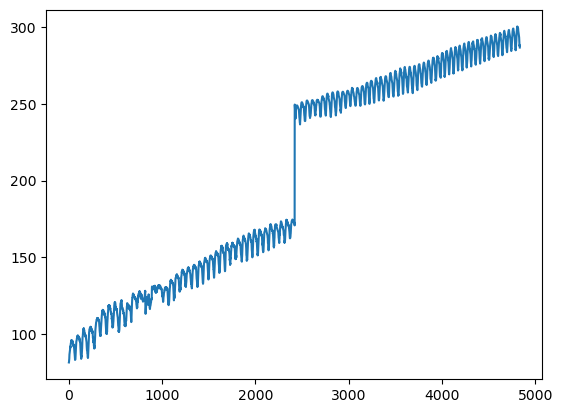

In [95]:
plt.plot(abs(y_test-predictions))